**Projet de Machine Learning**

Prédiction des crises cardiaques

**Auteur** : **Alioune WADE**

*MASTER 1 SCIENCES DES DONNEES ET APPLICATIONS*

*OPTION : Ingénierie des données et Intelligence artificielle*

**PLAN**

## 1. Introduction du projet

Ce projet vise à prédire la probabilité de survenue d'une crise cardiaque à partir de caractéristiques médicales.
La prédiction précoce de ce type d'événement est essentielle pour la prévention et le traitement des maladies cardiovasculaires.

Notre objectif est de construire un modèle de classification efficace et interprétable, capable d’alerter en cas de risque élevé.
Nous avons choisi un algorithme de classification linéaire (régression logistique) pour sa simplicité et sa robustesse dans les cas linéaires.

Une bonne solution se mesurera à travers des métriques telles que l’accuracy, le rappel, la précision et la F1-score.


## 2. Description du jeu de données

Nous utilisons un jeu de données contenant plusieurs caractéristiques médicales : âge, pression artérielle, cholestérol, taux de sucre, fréquence cardiaque, etc.

Certaines variables sont binaires (par exemple `sex`, `fbs`, `exng`) tandis que d'autres sont continues. La variable cible (`output`) indique la présence ou l'absence de maladie cardiaque.

Nous avons effectué une analyse statistique et visuelle pour identifier :
- La distribution des variables
- La corrélation entre les variables
- Les valeurs manquantes
- Les potentiels déséquilibres de classe


## 3. Prétraitement des données

Les étapes de prétraitement effectuées sont :

- **Imputation** des valeurs manquantes
- **Encodage** des variables catégorielles
- **Standardisation** des données numériques
- **Suppression des doublons** si nécessaire

Ces traitements assurent une qualité optimale des données avant l'entraînement du modèle.


## 4. Enrichissement et réflexion sur les données

Certaines données utiles sont absentes de notre jeu :

- **Historique médical** : des données médicales historiques seraient précieuses
- **Mode de vie** : activité physique, alimentation, tabac
- **Génétique** : antécédents familiaux

Ces données pourraient être intégrées à l’avenir via des questionnaires médicaux ou des bases de données enrichies. Leur ajout permettrait de renforcer la robustesse et la précision du modèle.


## 5. Choix de l’algorithme

Nous avons retenu la **régression logistique** pour sa simplicité, sa rapidité d’entraînement et sa bonne capacité de généralisation sur des données linéaires.

Nous avons également envisagé :
- **SVM** : plus robuste mais plus complexe à paramétrer
- **Arbres de décision** : plus interprétables mais sensibles à l’overfitting
- **KNN** : performances moyennes, surtout en haute dimension

Notre choix est donc motivé par la clarté et l’efficacité de la régression logistique dans notre contexte.


## 6. Entraînement et validation du modèle

Nous avons séparé notre jeu de données en ensembles d’entraînement et de test.

Le modèle a été entraîné sur l’ensemble d’entraînement, et évalué sur le test avec les métriques suivantes :
- **Accuracy**
- **Précision**
- **Rappel**
- **F1-score**

Une matrice de confusion a été utilisée pour observer les performances par classe.


## 7. Résultats et analyse critique

Notre modèle montre une **bonne précision globale**, avec des performances équilibrées entre rappel et précision.

Cependant, certains cas sont mal classés, notamment lorsque les patients ont un profil médical ambivalent. Le modèle reste limité par :
- L’hypothèse de linéarité
- Le bruit dans certaines variables
- L'absence de données contextuelles ou longitudinales

Ces résultats sont encourageants mais peuvent être améliorés par un enrichissement du jeu de données ou l’utilisation de modèles plus complexes.


## 8. Conclusion et perspectives

Ce projet a permis de mettre en place un pipeline complet de classification pour la prédiction de crise cardiaque.

Nous avons montré qu’un modèle simple peut déjà offrir de bonnes performances. Toutefois, plusieurs pistes d’amélioration existent :
- Essayer des modèles non linéaires (random forest, gradient boosting)
- Ajouter des données comportementales ou cliniques
- Optimiser les hyperparamètres via une recherche systématique

Ce projet est une base solide pour des travaux plus approfondis dans le domaine de la santé prédictive.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

**Chargement de notre dataset**

In [ ]:
fichier = "/content/sample_data/Prédiction_crise_cardiaque.csv"
df = pd.read_csv(fichier)

**Affichage et Analyse exploratoire de notre dataset**

In [ ]:
# Afficher les informations de base
print(f"Dimensions du dataset: {df.shape}")
print("\n5 premières lignes:")
print(df.head())
print("\nStatistiques descriptives:")
print(df.describe())
print("\nTypes de données et valeurs manquantes:")
print(df.info())

Dimensions du dataset: (158355, 28)

5 premières lignes:
   age  gender region income_level  hypertension  diabetes  cholesterol_level  \
0   60    Male  Rural       Middle             0         1                211   
1   53  Female  Urban          Low             0         0                208   
2   62  Female  Urban          Low             0         0                231   
3   73    Male  Urban          Low             1         0                202   
4   52    Male  Urban       Middle             1         0                232   

   obesity  waist_circumference  family_history  ... blood_pressure_diastolic  \
0        0                   83               0  ...                       62   
1        0                  106               1  ...                       76   
2        1                  112               1  ...                       74   
3        0                   82               1  ...                       65   
4        0                   89               0  ..

**Vérification des valeurs manquantes**

In [ ]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())
# Si tu veux supprimer les lignes avec des valeurs manquantes
df = df.dropna()
# Ou remplir les valeurs manquantes par la moyenne, la médiane ou une valeur spécifique
#df['alcohol_consumption'] = df['alcohol_consumption'].fillna(df['alcohol_consumption'].mean())#Spécifier le nom des colonnes où il y'a présence de valeurs manquantes

age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                

**Vérification des doublons**

In [ ]:
# Vérifier les doublons
print(df.duplicated().sum())
# Supprimer les doublons
#df = df.drop_duplicates()


0


**Séparation des variables selon leur type**

In [ ]:
# Colonnes selon leur type
numerical_features = [
    'age', 'waist_circumference', 'sleep_hours',
    'blood_pressure_systolic', 'blood_pressure_diastolic','cholesterol_level',
    'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

binary_features = [
    'hypertension', 'diabetes', 'obesity', 'family_history',
    'previous_heart_disease', 'medication_usage', 'participated_in_free_screening'
]

categorical_features = [
    'gender', 'region', 'income_level', 'smoking_status',
    'alcohol_consumption', 'physical_activity', 'dietary_habits',
    'air_pollution_exposure', 'EKG_results','stress_level'
]

target = 'heart_attack' #Notre variable cible


**Variables numériques**

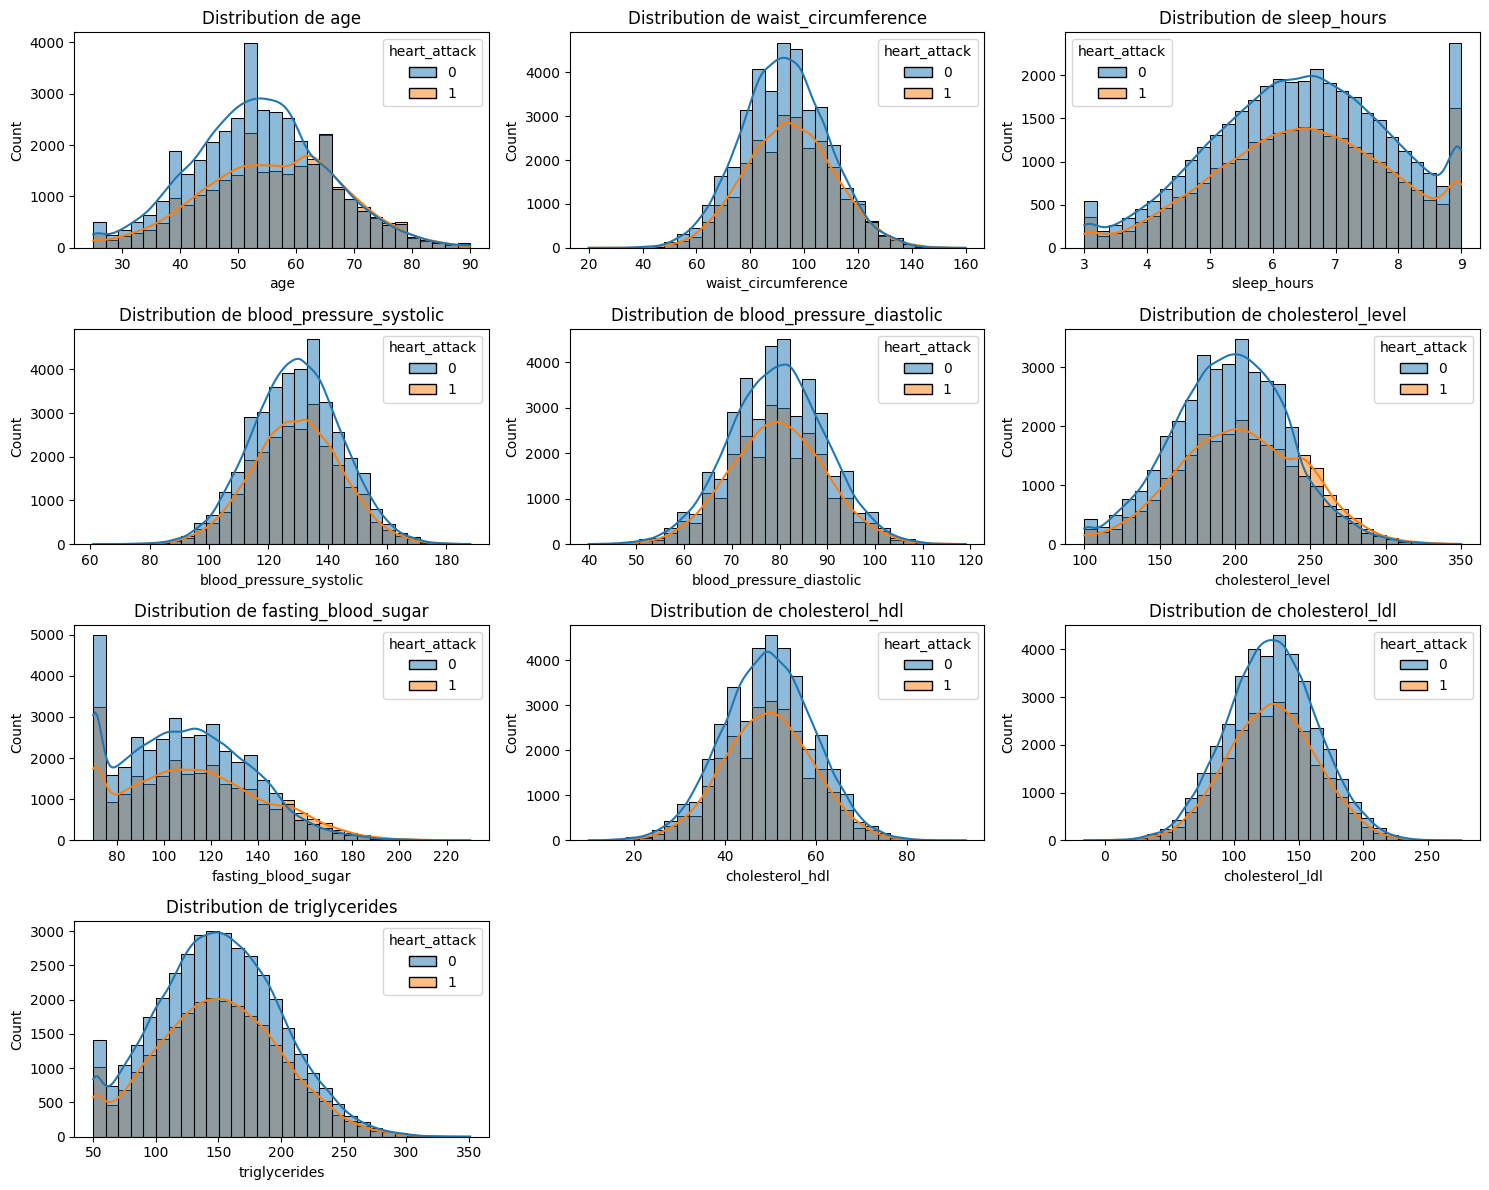

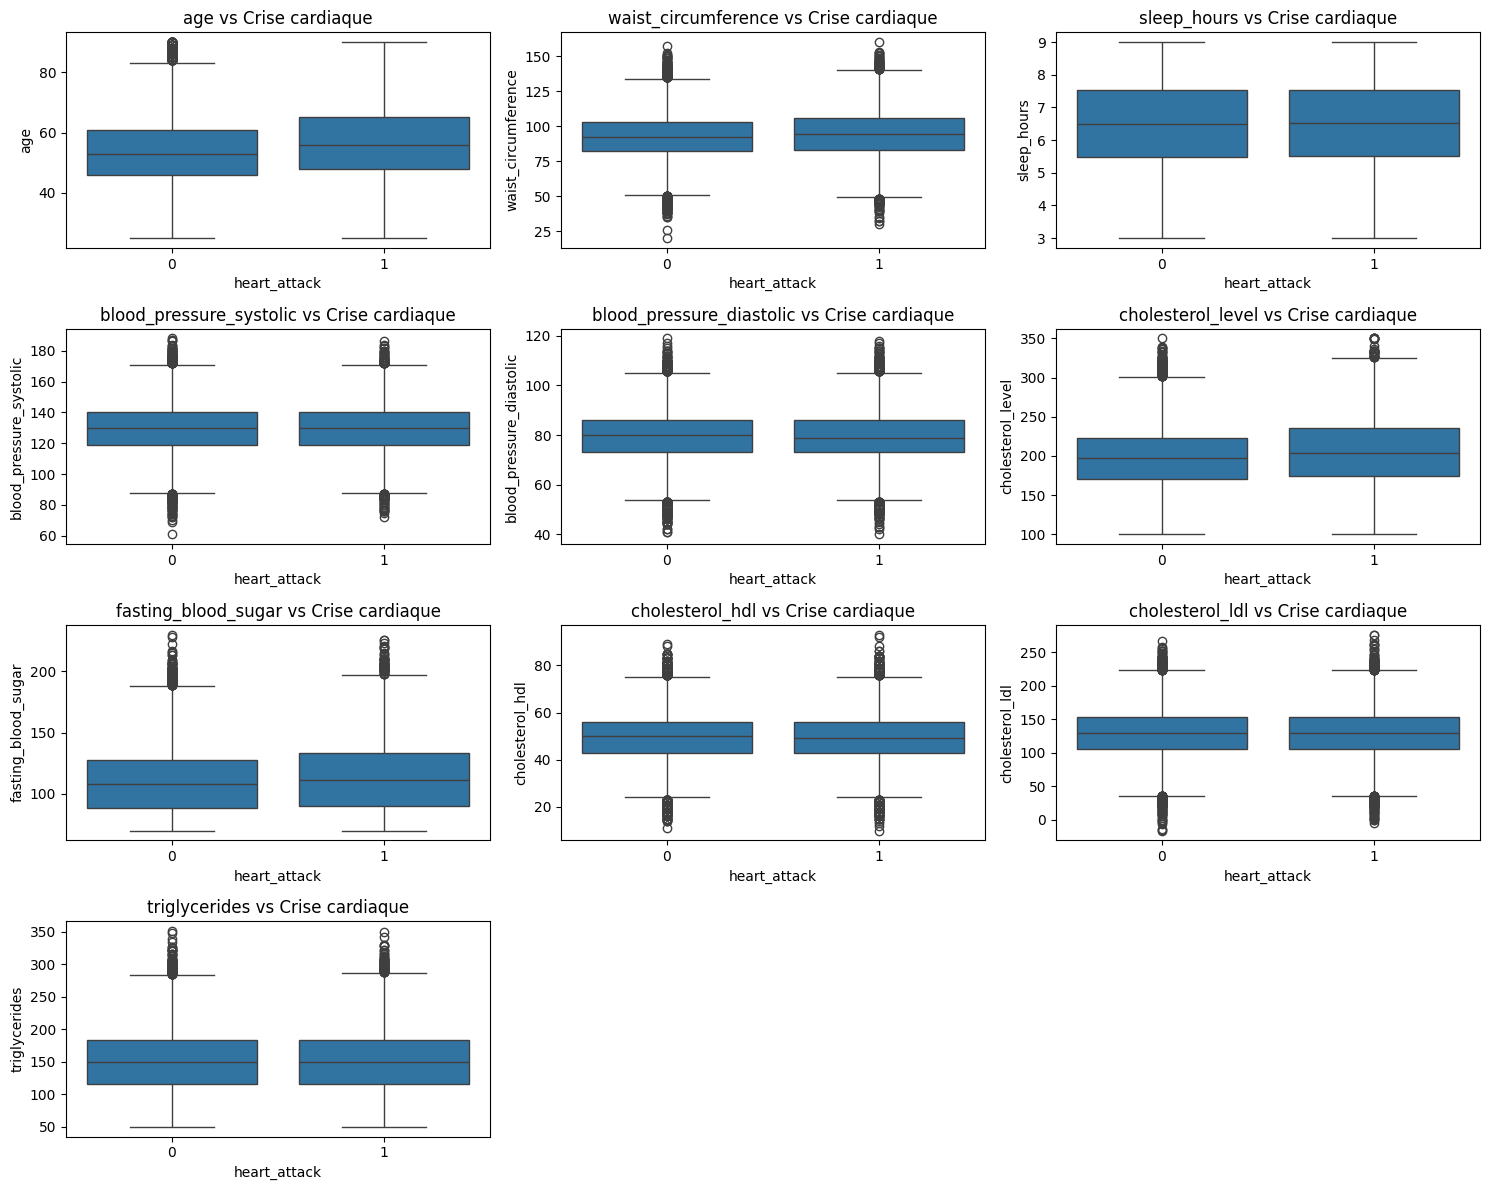

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#  Distribution des variables numériques
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, hue='heart_attack', kde=True, bins=30)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

# Boxplots par statut de crise cardiaque
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='heart_attack', y=col, data=df)
    plt.title(f'{col} vs Crise cardiaque')
plt.tight_layout()
plt.show()


**Variables catégorielles**

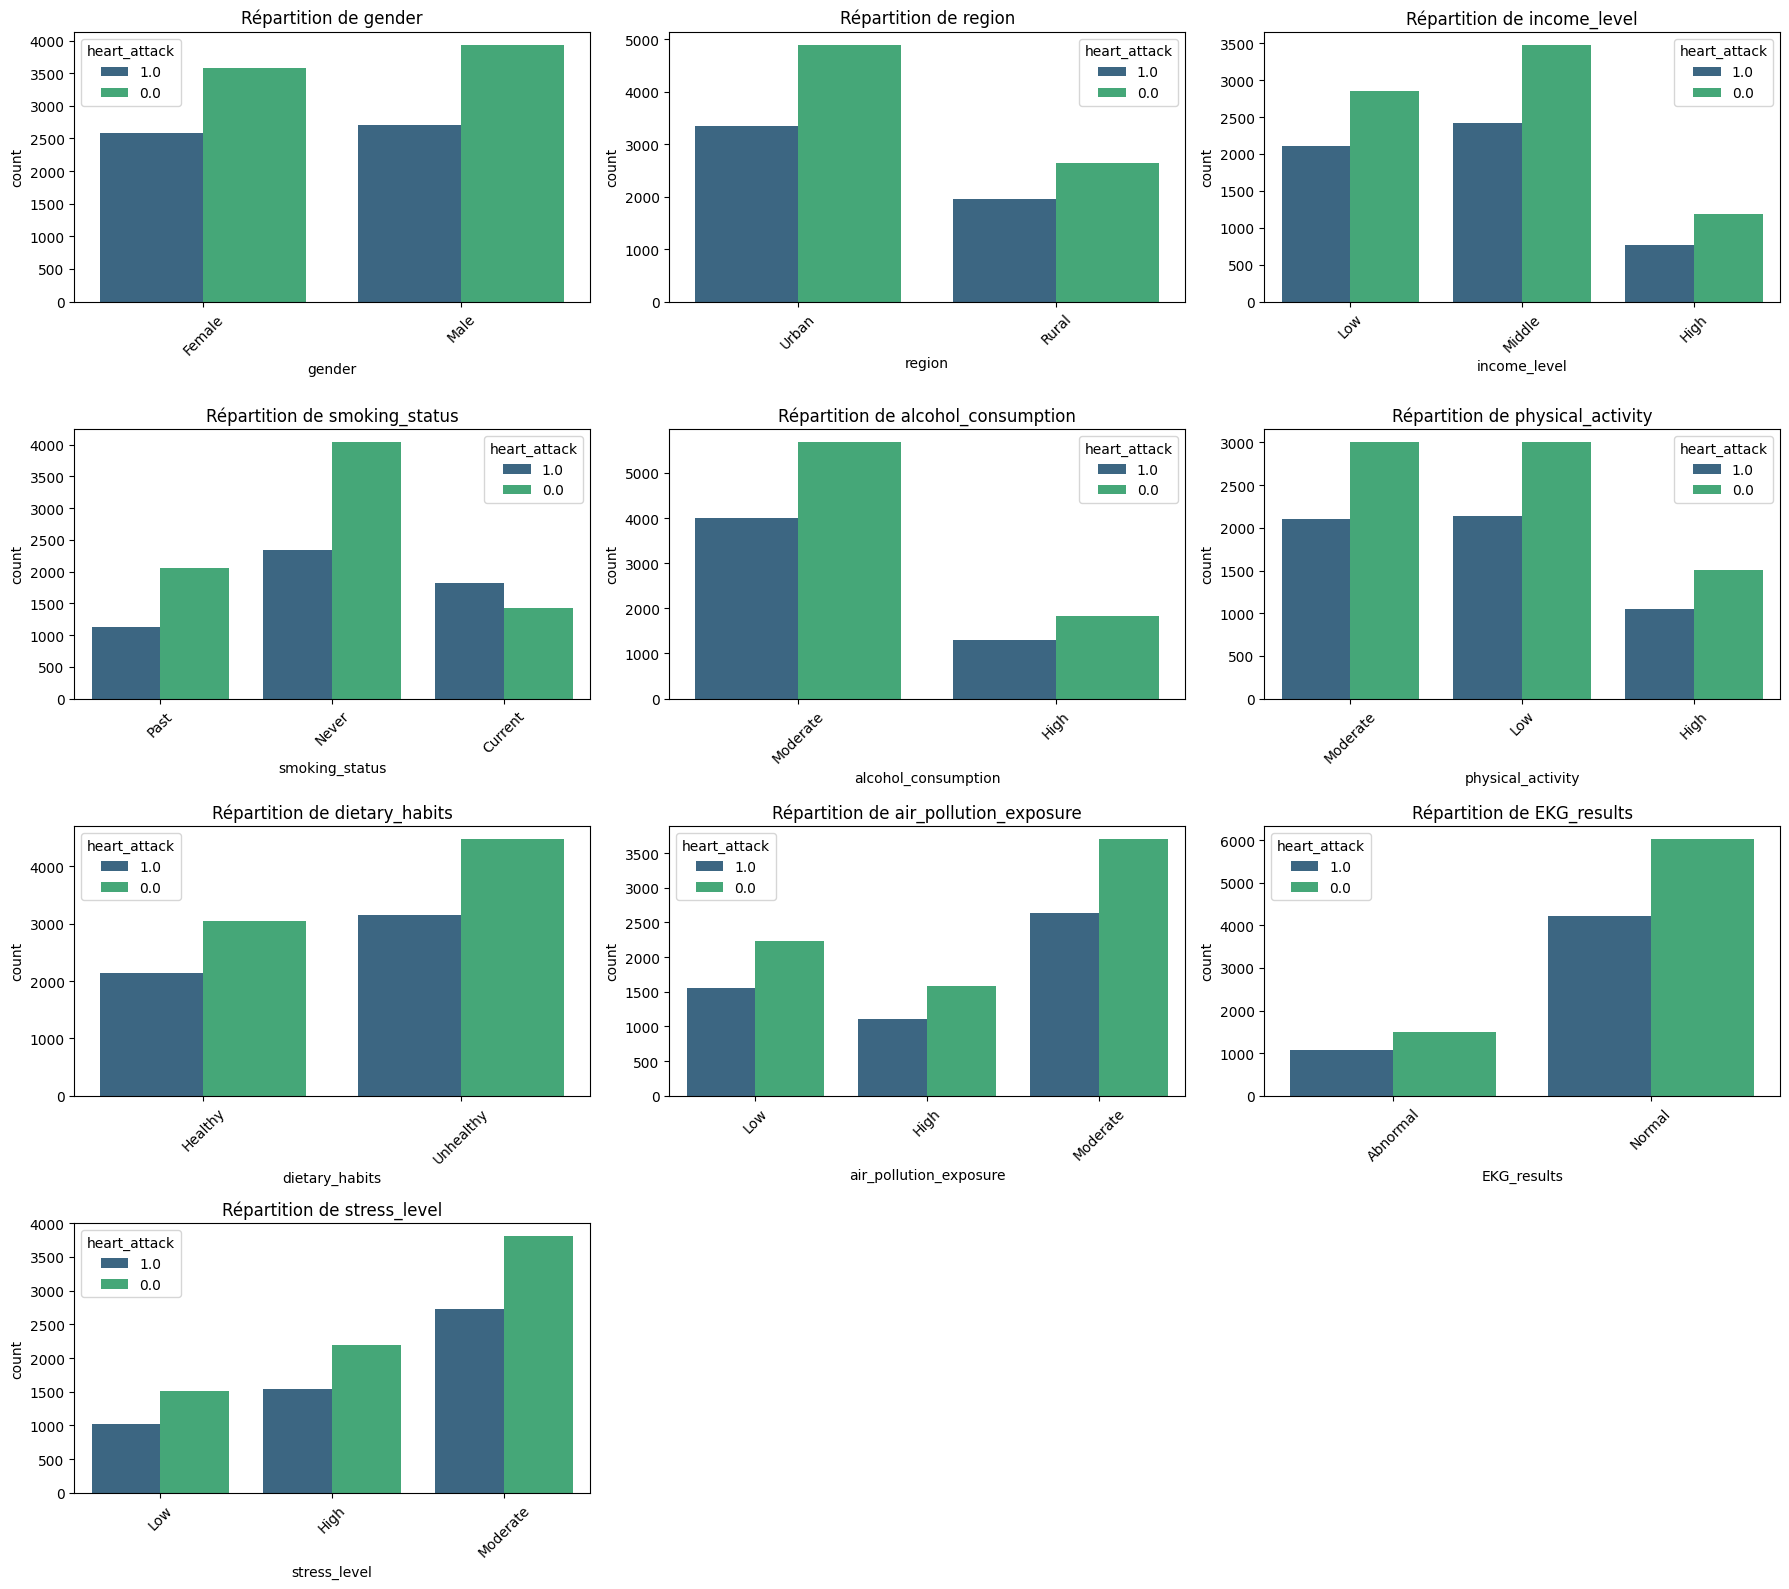

In [ ]:
import math

n = len(categorical_features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(6 * cols, 4 * rows))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(rows, cols, i)

    sns.countplot(
        x=df[col].astype(str),
        hue=df['heart_attack'].astype(str),
        palette='viridis'
    )

    plt.title(f'Répartition de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Variables binaires**

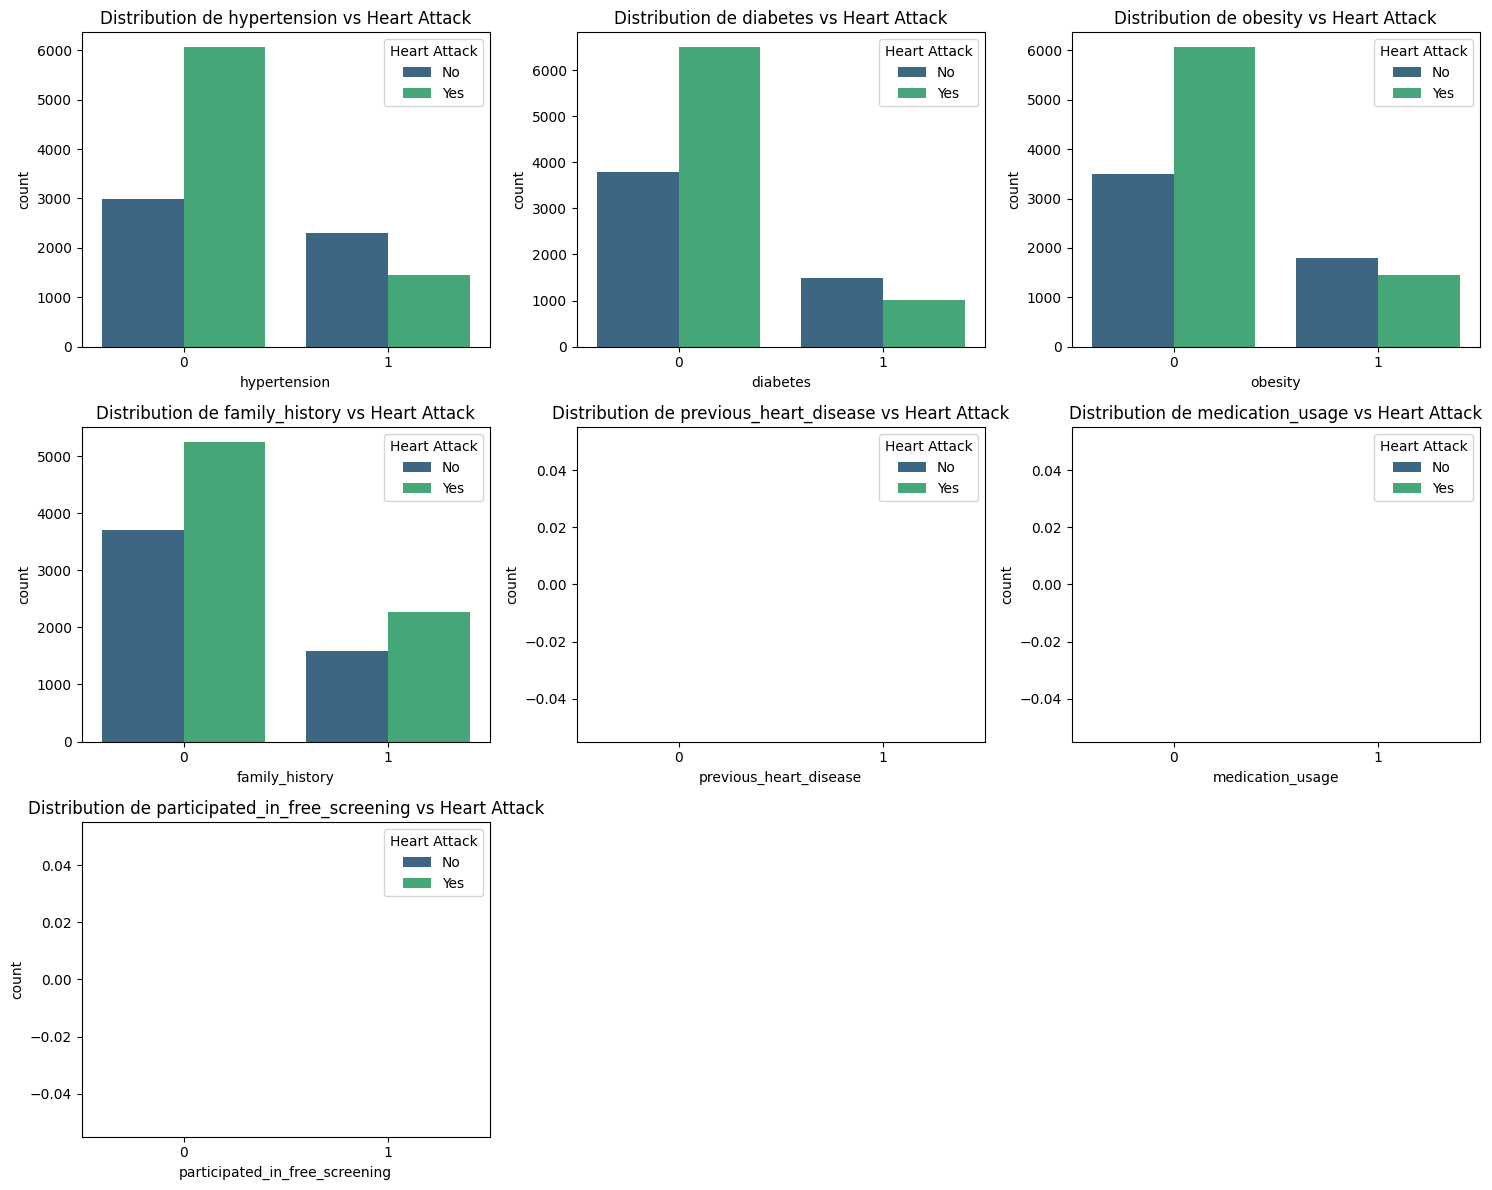

In [ ]:
import math

# Variables binaires : 7
n_cols = 3
n_rows = math.ceil(len(binary_features) / n_cols)  # Calcule le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(binary_features, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.countplot(
        x=df[col].astype(str),
        hue=df['heart_attack'].astype(str),
        palette='viridis',
        order=['0', '1']
    )

    plt.title(f'Distribution de {col} vs Heart Attack')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.legend(title='Heart Attack', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


**Matrice de corrélation**

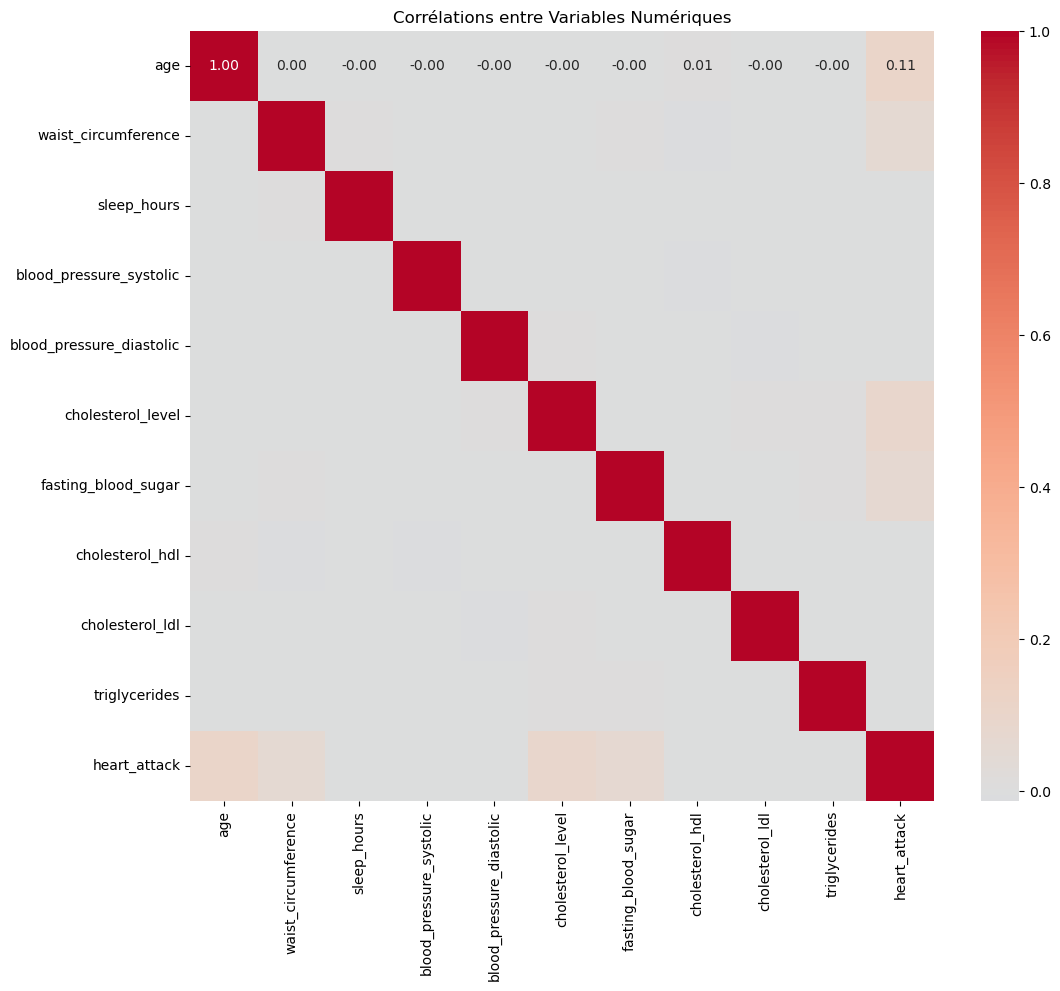

Significativité des associations (chi2):
                 Variable   p-value
3          smoking_status  0.000000
1                  region  0.042642
8             EKG_results  0.073596
9            stress_level  0.267861
7  air_pollution_exposure  0.283529
6          dietary_habits  0.390689
4     alcohol_consumption  0.414488
0                  gender  0.428044
5       physical_activity  0.473284
2            income_level  0.855628


In [ ]:
# Calcul séparé pour les numériques
corr_num = df[numerical_features + ['heart_attack']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_num, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Corrélations entre Variables Numériques')
plt.show()

# Analyse des associations pour les catégorielles (test du chi2)
from scipy.stats import chi2_contingency

chi2_results = []
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['heart_attack'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Variable': col, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results)
print("Significativité des associations (chi2):")
print(chi2_df.sort_values('p-value'))

In [ ]:
#A comprendre

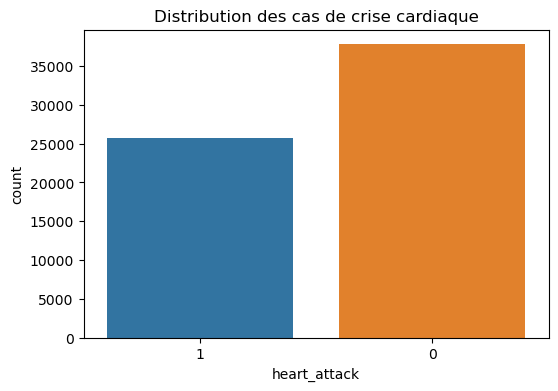

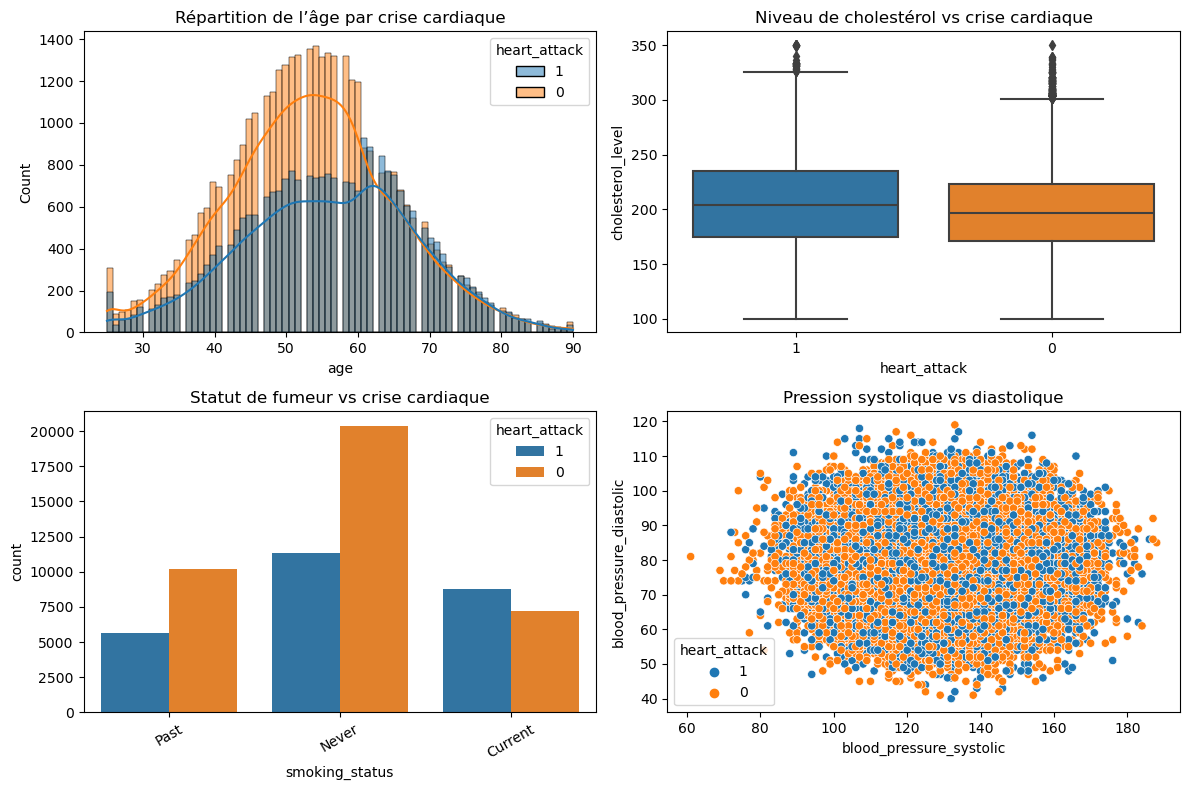

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#  Distribution de la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_attack', data=df)
plt.title('Distribution des cas de crise cardiaque')
plt.show()

df = df.copy()
#  Vérification : conversions explicites si nécessaire
df['heart_attack'] = df['heart_attack'].astype(str)
df['smoking_status'] = df['smoking_status'].astype(str)

# Distribution de quelques variables clés
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=df, x='age', hue='heart_attack', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Répartition de l’âge par crise cardiaque')

sns.boxplot(x='heart_attack', y='cholesterol_level', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Niveau de cholestérol vs crise cardiaque')

sns.countplot(x='smoking_status', hue='heart_attack', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Statut de fumeur vs crise cardiaque')
axes[1, 0].tick_params(axis='x', rotation=30)

sns.scatterplot(
    x='blood_pressure_systolic',
    y='blood_pressure_diastolic',
    hue='heart_attack',
    data=df,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Pression systolique vs diastolique')

plt.tight_layout()
plt.show()


**Prétraitement des données**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Imputation + standardisation pour les données numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Imputation + encodage pour les données catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Transformation complète
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
], remainder='passthrough')

# Séparation train/test
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Modélisation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Pipeline complet
model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))

# Entraînement
model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'waist_circumference',
                                                   'sleep_hours',
                                                   'blood_pressure_systolic',
                                                   'blood_pressure_diastolic',
                                                   'cholesterol_level',
                                                   'fasting_blood_sugar',
                                                   'cholesterol_hdl',
                                                   'cholesterol_ldl',
                                                   't...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'region',
                                                   'income_level',
                                                   'smoking_status',
                                                   'alcohol_consumption',
                                                   'physical_activity',
                                                   'dietary_habits',
                                                   'air_pollution_exposure',
                                                   'EKG_results',
                                                   'stress_level'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

**Evaluation du modèle**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6214 1373]
 [2080 3035]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      7587
           1       0.69      0.59      0.64      5115

    accuracy                           0.73     12702
   macro avg       0.72      0.71      0.71     12702
weighted avg       0.72      0.73      0.72     12702



**Matrice de confusion**

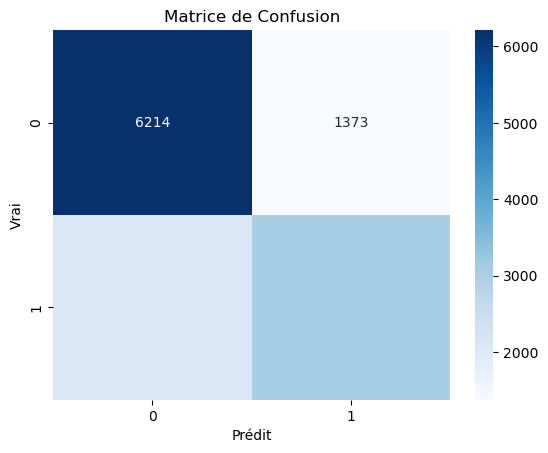

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()


**Visualisation de la courbe ROC**

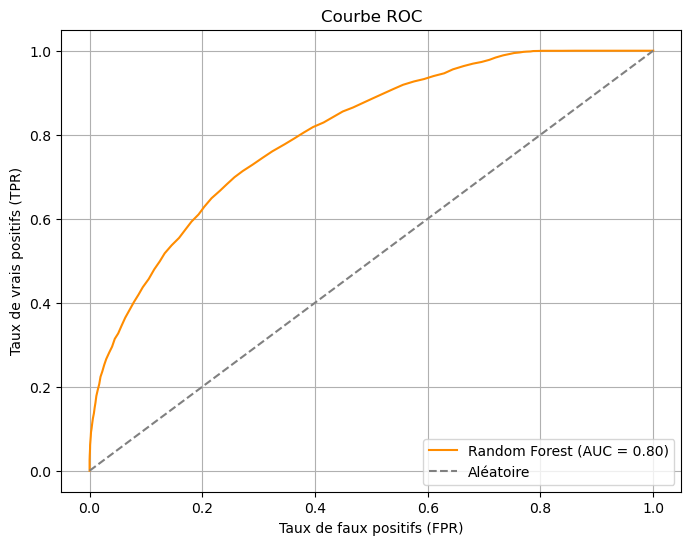

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Reconvertir la cible en entier pour le calcul ROC
y_test_int = y_test.astype(int)

# Probabilités prédites (classe 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test_int, y_probs)
roc_auc = roc_auc_score(y_test_int, y_probs)

# Tracé
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aléatoire')

plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Création de notre fonction de prédiction**

In [ ]:
def predict_heart_attack(patient_data, model):
    """
    Prédit si un patient est susceptible d'avoir une crise cardiaque.

    :param patient_data: Dictionnaire avec les infos du patient
    :param model: Pipeline entraîné contenant le preprocessor + modèle
    :return: La prédiction (0 = pas à risque, 1 = à risque)
    """
    # Liste des colonnes attendues
    required_columns = numerical_features + binary_features + categorical_features

    # Créer un DataFrame avec les données du patient
    patient_df = pd.DataFrame([patient_data])

    # Ajouter les colonnes manquantes avec des valeurs par défaut
    for col in required_columns:
        if col not in patient_df.columns:
            if col in numerical_features:
                patient_df[col] = 0
            elif col in binary_features:
                patient_df[col] = 0
            else:  # Catégorielles
                patient_df[col] = 'Unknown'

    # Réorganiser les colonnes dans l'ordre attendu
    patient_df = patient_df[required_columns]

    # Pas besoin de transformation ici car le model s'en charge
    prediction = model.predict(patient_df)

    return prediction[0]


**Test de notre fonction de prédiction**

In [ ]:
# Exemple d'utilisation avec notre patient numéro un
patient_info = {
    'age': 60,
    'waist_circumference': 83,
    'sleep_hours': 5,
    'blood_pressure_systolic': 113,
    'blood_pressure_diastolic': 62,
    'fasting_blood_sugar': 173,
    'cholesterol_hdl': 48,
    'cholesterol_ldl': 121,
    'triglycerides': 101,
    'hypertension': 0,  # 1 = Oui, 0 = Non
    'diabetes': 1,
    'cholesterol_level':211,
    'obesity': 0,
    'family_history': 0,
    'previous_heart_disease': 0,
    'medication_usage': 0,
    'participated_in_free_screening': 0,
    'gender': 'Male',
    'region': 'Rural',
    'income_level': 'Middle',
    'smoking_status': 'Never',
    'alcohol_consumption': 'None',
    'physical_activity': 'High',
    'dietary_habits': 'Unhealthy',
    'air_pollution_exposure': 'Moderate',
    'EKG_results': 'Normal',
    'stress_level': 'Moderate'
}

# Appel de la fonction de prédiction
prediction_result = predict_heart_attack(patient_info, model)

# Affichage du résultat
if prediction_result == 1:
    print("Le patient est à risque de crise cardiaque.")
else:
    print("Le patient n'est pas à risque de crise cardiaque.")


Le patient n'est pas à risque de crise cardiaque.


**On voit bien que le modèle prédit bien**